In [1]:
!pip install deepface
!pip install tf-keras

In [2]:
from deepface import DeepFace
from PIL import Image, ImageDraw
from IPython.display import display

2024-11-14 13:36:04.845853: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 13:36:04.977805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 13:36:05.092826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731591365.221234   38986 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731591365.253232   38986 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 13:36:05.493548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Define the folder and image name

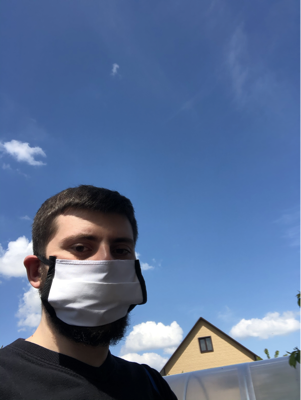

In [11]:
folder_name = "images/"
image_name = "w_mask_1.png"
image = Image.open(folder_name+image_name)
display(image)

### Analyze the Image
we can also try with diferent "detector_backend"

In [13]:
image = Image.open(folder_name+image_name)
analysis = DeepFace.analyze(img_path = folder_name+image_name, detector_backend='retinaface')
print(analysis)

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]  

[{'emotion': {'angry': np.float32(0.1755582), 'disgust': np.float32(7.164366e-14), 'fear': np.float32(0.0020139413), 'happy': np.float32(0.16351117), 'sad': np.float32(96.82466), 'surprise': np.float32(1.9894902e-08), 'neutral': np.float32(2.834257)}, 'dominant_emotion': 'sad', 'region': {'x': 41, 'y': 211, 'w': 96, 'h': 109, 'left_eye': (122, 250), 'right_eye': (80, 248)}, 'face_confidence': np.float64(1.0), 'age': 26, 'gender': {'Woman': np.float32(4.1545796), 'Man': np.float32(95.84543)}, 'dominant_gender': 'Man', 'race': {'asian': np.float32(2.1801937), 'indian': np.float32(2.352617), 'black': np.float32(0.40263733), 'white': np.float32(61.272358), 'middle eastern': np.float32(19.754051), 'latino hispanic': np.float32(14.038141)}, 'dominant_race': 'white'}]


Draw image with bounding box

{'x': 41, 'y': 211, 'w': 96, 'h': 109, 'left_eye': (122, 250), 'right_eye': (80, 248)}


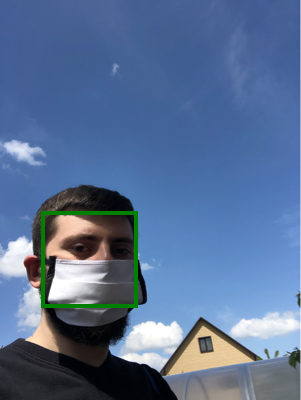

In [14]:
draw = ImageDraw.Draw(image)
for item in analysis:
    print(item['region'])
    region = item['region']
    draw.rectangle([(region['x'], region['y']), (region['x'] + region['w'], region['y'] + region['w'])], outline='green', width=4)

modified_folder_name = folder_name+"MOD_" + image_name # generate a name to the image with the rectangles
image.save(modified_folder_name) # save the modified image on the /image folder

image = Image.open(modified_folder_name)
display(image)